In [13]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
from keras.preprocessing import image

In [14]:
classifier = Sequential()

In [16]:
classifier.add(Convolution2D(32, (3, 3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\siddu\\Desktop\\Local\\Module-Z(Pothole)\\data',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory('C:\\Users\\siddu\\Desktop\\Local\\Module-Z(Pothole)\\data',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 681 images belonging to 2 classes.
Found 681 images belonging to 2 classes.


In [19]:
classifier.fit(training_set,
        steps_per_epoch=562,
        epochs=25,
        validation_data=test_set,
        validation_steps=101)

Epoch 1/25
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.6869 - loss: 0.5740 - val_accuracy: 0.8194 - val_loss: 0.3692
Epoch 2/25
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.8094 - loss: 0.4116 - val_accuracy: 0.8767 - val_loss: 0.2828
Epoch 3/25
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.8593 - loss: 0.3259 - val_accuracy: 0.8311 - val_loss: 0.3717
Epoch 4/25
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8649 - loss: 0.3193 - val_accuracy: 0.8972 - val_loss: 0.2306
Epoch 5/25
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.8844 - loss: 0.2850 - val_accuracy: 0.8355 - val_loss: 0.3602
Epoch 6/25
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8921 - loss: 0.2590 - val_accuracy: 0.7445 - val_loss: 0.4649
Epoch 7/25
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.8631 - loss: 0.2977 - val_accuracy: 0.9075 - val_loss: 0.2269
Epoch 8/25
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9063 - loss: 0.2159 - 

In [20]:
classifier.save("Ptz.h5")
classifier.save("Ptz.keras")

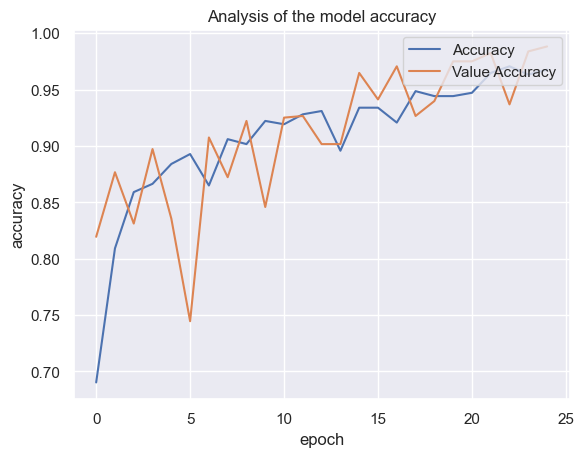

In [21]:
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title('Analysis of the model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Value Accuracy'], loc='upper right')
plt.show()

In [22]:
def predictImg(imgpath):
    predict_image = image.load_img(imgpath, target_size = (64,64))
    predict_image = image.img_to_array(predict_image)
    predict_image = np.expand_dims(predict_image, axis=0)
    result = classifier.predict(predict_image)
    x = result.max()
    if x == 0:
        return("Normal")
    else:
        return("Pothole")

In [23]:
predictImg("C:\\Users\\siddu\\Desktop\\Local\\Module-Z(Pothole)\\data\\potholes\\6.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


'Pothole'